<a href="https://colab.research.google.com/github/Ark1789/NetflixBC/blob/main/BussinessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM STATEMENT
The primary objective is to analyze Netflix's content data to provide actionable insights that can help Netflix decide which types of shows or movies to produce and how to grow its business in different countries. By understanding trends, preferences, and content availability across different regions, Netflix can make data-driven decisions to enhance its offerings, attract more subscribers, and stay ahead of competitors.

Objectives

1. Find the most popular movie and TV show ratings in different countries.
2. Study how movie durations and TV show seasons have changed over the years.
3. Compare how movies and TV shows perform based on their ratings and lengths.
4. Understand the best length and type for TV shows and movies today.
5. See which types of movies and TV shows are watched the most in different countries.


In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.shape

(8807, 12)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
missing_data=data.isna().sum()
missing_data

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
missing_data.sum()/data.shape[0]*100

48.904280685818094

missing_data.shape

In [ ]:
missing_data/data.shape[0]*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### **Key Observations:**

- **Data Shape:**
  - The dataset has **8,807 rows** and **12 columns**.

- **Data Types:**
  - Most columns are of type `object` (strings), except for `release_year` which is an `integer`.
  - This indicates a mix of categorical and numerical data that requires appropriate handling during analysis.

- **Missing Values:**
  - `director` has about **29.9% missing values**.
  - `cast` and `country` have about **9.4% missing values**.
  - Other columns like `date_added`, `rating`, and `duration` have **minimal missing data**.

- **Data Distribution:**
  - The `release_year` ranges from **1925 to 2021**, indicating that the dataset covers a wide range of historical and recent content.


### **Step 2: Data Cleaning and Preprocessing**

#### **Unnesting and Joining Data:**
- Unnested columns such as `cast`, `director`, `country`, and `listed_in`
- Joined the unnested data back to the main dataframe, creating separate columns with suffixes (e.g., `cast_unnest`, `director_unnest`)
- Applied `ffill` (forward fill) and `bfill` (backward fill) to handle missing values within grouped entries based on `show_id`.

#### **Country Imputation:**
- Used a structured process to impute missing values in the `country_unnest` column:
  - Checked combinations of (`cast`, `director`) using a pre-existing `director_cast_country_map` to fill in missing countries.
  - Used `director_country_map` and `cast_country_map` when only one of the attributes matched.
  - Assigned 'unknown_country' when no matching information was available.

#### **Handling Date Columns:**
- Converted `date_added` to `datetime` format and extracted `year_added` and `month_added` columns for temporal analysis.

#### **Handling Duplicates:**
- Removed duplicate entries generated after unnesting and filling operations, ensuring that each record in the dataset was unique.

#### **Data Type Conversion:**
- Converted relevant columns such as `type` and `rating` to categorical data types
- Extracted numeric values from `duration` for both movies and TV shows


In [ ]:
    data["cast"].str.split(",", expand=True).stack().reset_index(level=0).rename(columns={0: 'cast'})

,level_0,cast
0,1,Ama Qamata
1,1,Khosi Ngema
2,1,Gail Mabalane
3,1,Thabang Molaba
4,1,Dillon Windvogel
...,...,...
3,8806,Manish Chaudhary
4,8806,Meghna Malik
5,8806,Malkeet Rauni
6,8806,Anita Shabdish


In [ ]:

unnested_data = pd.concat([
    data["cast"].str.split(",", expand=True).stack().reset_index(level=0).rename(columns={0: 'cast'}),
    data["listed_in"].str.split(",", expand=True).stack().reset_index(level=0).rename(columns={0: 'listed_in'}),
    data["director"].str.split(",", expand=True).stack().reset_index(level=0).rename(columns={0: 'director'}),
    data["country"].str.split(",", expand=True).stack().reset_index(level=0).rename(columns={0: 'country'})
], axis=0).reset_index(drop=True)

unnested_data.set_index("level_0",inplace=True)
unnested_data

,cast,listed_in,director,country
level_0,,,,
1,Ama Qamata,NaN,NaN,NaN
1,Khosi Ngema,NaN,NaN,NaN
1,Gail Mabalane,NaN,NaN,NaN
1,Thabang Molaba,NaN,NaN,NaN
1,Dillon Windvogel,NaN,NaN,NaN
...,...,...,...,...
8801,NaN,NaN,NaN,Jordan
8802,NaN,NaN,NaN,United States
8804,NaN,NaN,NaN,United States


In [ ]:
merged_data = data.join(unnested_data, rsuffix='_unnest').drop(['director', 'cast', 'country', 'listed_in'],axis=1)
merged_data.loc[1]

,show_id,type,title,date_added,release_year,rating,duration,description,cast_unnest,listed_in_unnest,director_unnest,country_unnest
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Thabang Molaba,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Dillon Windvogel,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Natasha Thahane,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Arno Greeff,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Xolile Tshabalala,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Getmore Sithole,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Cindy Mahlangu,NaN,NaN,NaN


In [ ]:
merged_data.shape

(100446, 12)

In [ ]:
merged_data.drop_duplicates(inplace=True)
merged_data.shape

(100444, 12)

In [ ]:
merged_data.isna().sum()

,0
show_id,0
type,0
title,0
date_added,98
release_year,0
rating,48
duration,12
description,0
cast_unnest,36320
listed_in_unnest,81121


In [ ]:
merged_data.set_index("show_id",inplace=True)

In [ ]:
merged_data=merged_data.groupby("show_id", as_index=False).ffill().reset_index()
merged_data.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast_unnest,listed_in_unnest,director_unnest,country_unnest
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Documentaries,NaN,NaN
1,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Documentaries,Kirsten Johnson,NaN
2,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Documentaries,Kirsten Johnson,United States
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,NaN,NaN,NaN
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,NaN,NaN,NaN


In [ ]:
merged_data.set_index("show_id",inplace=True)

In [ ]:
merged_data=merged_data.groupby("show_id",as_index=False).bfill().reset_index()
merged_data.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast_unnest,listed_in_unnest,director_unnest,country_unnest
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Documentaries,Kirsten Johnson,United States
1,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Documentaries,Kirsten Johnson,United States
2,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Documentaries,Kirsten Johnson,United States
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,NaN,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,NaN,South Africa


In [ ]:
merged_data.isna().sum()

,0
show_id,0
type,0
title,0
date_added,98
release_year,0
rating,48
duration,12
description,0
cast_unnest,2964
listed_in_unnest,0


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100444 entries, 0 to 100443
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   show_id           100444 non-null  object
 1   type              100444 non-null  object
 2   title             100444 non-null  object
 3   date_added        100346 non-null  object
 4   release_year      100444 non-null  int64 
 5   rating            100396 non-null  object
 6   duration          100432 non-null  object
 7   description       100444 non-null  object
 8   cast_unnest       97480 non-null   object
 9   listed_in_unnest  100444 non-null  object
 10  director_unnest   73338 non-null   object
 11  country_unnest    93351 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.2+ MB


In [ ]:
merged_data_handle=merged_data.copy()

In [ ]:
merged_data_handle_dupdrop=merged_data_handle.drop_duplicates().reset_index(drop=True)

In [ ]:
merged_data_handle_dupdrop.isna().sum()

,0
show_id,0
type,0
title,0
date_added,79
release_year,0
rating,40
duration,3
description,0
cast_unnest,1820
listed_in_unnest,0


In [ ]:
merged_data_handle_dupdrop.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast_unnest,listed_in_unnest,director_unnest,country_unnest
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,NaN,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,NaN,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane,International TV Shows,NaN,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Thabang Molaba,International TV Shows,NaN,South Africa


In [ ]:
merged_data_handle_dupdrop.isna().sum()

,0
show_id,0
type,0
title,0
date_added,79
release_year,0
rating,40
duration,3
description,0
cast_unnest,1820
listed_in_unnest,0


In [ ]:


director_country=merged_data_handle_dupdrop.groupby(["cast_unnest","director_unnest"])["country_unnest"].agg(lambda x:x.mode().iloc[0] if len(x.mode())>0 else "unknown_country").reset_index()
director_country

,cast_unnest,director_unnest,country_unnest
0,Jr.,Sam Macaroni,United States
1,"""Riley"" Lakdhar Dridi",Rebecca Zlotowski,France
2,'Najite Dede,Aniedi Anwah,Nigeria
3,2Mex,Ava DuVernay,United States
4,50 Cent,Brian A. Miller,United Kingdom
...,...,...,...
43787,Çetin Tekindor,Çagan Irmak,Turkey
43788,Úrsula Corberó,Julio Medem,Spain
43789,İbrahim Büyükak,Bedran Güzel,Turkey
43790,Şahin Irmak,Hakan Algül,Turkey


In [ ]:

director_cast_country_map = director_country.set_index(['cast_unnest', 'director_unnest'])['country_unnest'].to_dict()
director_country_map = director_country.groupby('director_unnest')['country_unnest'].first().to_dict()
cast_country_map = director_country.groupby('cast_unnest')['country_unnest'].first().to_dict()


In [ ]:

# Define a function to fill missing country values
def fill_country(row):
    if pd.isna(row['country_unnest']):

        if (row['cast_unnest'], row['director_unnest']) in director_cast_country_map:
            return director_cast_country_map[(row['cast_unnest'], row['director_unnest'])]

        elif row['director_unnest'] in director_country_map:
            return director_country_map[row['director_unnest']]

        elif row['cast_unnest'] in cast_country_map:
            return cast_country_map[row['cast_unnest']]
        else:
            return 'unknown_country'
    else:
        return row['country_unnest']

merged_data_handle_dupdrop['country_unnest'] = merged_data_handle_dupdrop.apply(fill_country, axis=1)

merged_data_handle_dupdrop.head()


,show_id,type,title,date_added,release_year,rating,duration,description,cast_unnest,listed_in_unnest,director_unnest,country_unnest
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,NaN,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,NaN,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane,International TV Shows,NaN,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Thabang Molaba,International TV Shows,NaN,South Africa


In [ ]:
merged_data_handle_dupdrop.isna().sum()

,0
show_id,0
type,0
title,0
date_added,79
release_year,0
rating,40
duration,3
description,0
cast_unnest,1820
listed_in_unnest,0


In [ ]:
processed_data=merged_data_handle_dupdrop.copy()

In [ ]:

# Keep "missing_values" unchanged and convert other valid entries to datetime
processed_data['date_added'] = processed_data['date_added'].apply(
    lambda x: pd.to_datetime(x, format='%B %d, %Y', errors='coerce') if x != "missing_values" else x
)

processed_data['year_added'] = processed_data['date_added'].apply(
    lambda x: x.year if isinstance(x, pd.Timestamp) else "missing_values"
)

processed_data['month_added'] = processed_data['date_added'].apply(
    lambda x: x.strftime('%B') if isinstance(x, pd.Timestamp) else "missing_values"
)



In [ ]:

# If 'year_added' is "missing_values", replace it with 'release_year'
processed_data['year_added'] = processed_data.apply(
    lambda row: row['release_year'] if row['year_added'] == "missing_values" and pd.notnull(row['release_year']) else row['year_added'],
    axis=1
)


processed_data['year_added'] = pd.to_numeric(processed_data['year_added'], errors='coerce')



processed_data['year_added'] = processed_data['year_added'].astype(int)

In [ ]:
processed_data.isna().sum()

,0
show_id,0
type,0
title,0
date_added,809
release_year,0
rating,40
duration,3
description,0
cast_unnest,1820
listed_in_unnest,0


In [ ]:
processed_data.columns

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating',
       'duration', 'description', 'cast_unnest', 'listed_in_unnest',
       'director_unnest', 'country_unnest', 'year_added', 'month_added'],
      dtype='object')

In [ ]:
processed_data.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast_unnest,listed_in_unnest,director_unnest,country_unnest,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Documentaries,Kirsten Johnson,United States,2021,September
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,NaN,South Africa,2021,September
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,NaN,South Africa,2021,September
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane,International TV Shows,NaN,South Africa,2021,September
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Thabang Molaba,International TV Shows,NaN,South Africa,2021,September


In [ ]:

processed_data['rating'].fillna("missing_values", inplace=True)
processed_data['duration'].fillna("missing_values", inplace=True)
processed_data['cast_unnest'].fillna("missing_values", inplace=True)
processed_data['director_unnest'].fillna("missing_values", inplace=True)


In [ ]:
processed_data['type'] = processed_data['type'].astype('category')
processed_data['rating'] = processed_data['rating'].astype('category')
processed_data['listed_in_unnest'] = processed_data['listed_in_unnest'].astype('category')


In [ ]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           78313 non-null  object        
 1   type              78313 non-null  category      
 2   title             78313 non-null  object        
 3   date_added        77504 non-null  datetime64[ns]
 4   release_year      78313 non-null  int64         
 5   rating            78313 non-null  category      
 6   duration          78313 non-null  object        
 7   description       78313 non-null  object        
 8   cast_unnest       78313 non-null  object        
 9   listed_in_unnest  78313 non-null  category      
 10  director_unnest   78313 non-null  object        
 11  country_unnest    78313 non-null  object        
 12  year_added        78313 non-null  int64         
 13  month_added       78313 non-null  object        
dtypes: category(3), dateti

In [ ]:
processed_data.isna().sum()

,0
show_id,0
type,0
title,0
date_added,809
release_year,0
rating,0
duration,0
description,0
cast_unnest,0
listed_in_unnest,0


In [ ]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           78313 non-null  object        
 1   type              78313 non-null  category      
 2   title             78313 non-null  object        
 3   date_added        77504 non-null  datetime64[ns]
 4   release_year      78313 non-null  int64         
 5   rating            78313 non-null  category      
 6   duration          78313 non-null  object        
 7   description       78313 non-null  object        
 8   cast_unnest       78313 non-null  object        
 9   listed_in_unnest  78313 non-null  category      
 10  director_unnest   78313 non-null  object        
 11  country_unnest    78313 non-null  object        
 12  year_added        78313 non-null  int64         
 13  month_added       78313 non-null  object        
dtypes: category(3), dateti

In [ ]:
cleaned_data=processed_data.copy()

In [ ]:
cleaned_data["rating"]=cleaned_data["rating"].astype("str")
duration_mask = cleaned_data['rating'].str.contains("min")
cleaned_data.loc[duration_mask, 'duration'] = cleaned_data.loc[duration_mask, 'rating']
cleaned_data.loc[duration_mask, 'rating'] = 'missing_values'

cleaned_data["rating"]=cleaned_data["rating"].astype(pd.CategoricalDtype(ordered=False))
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           78313 non-null  object        
 1   type              78313 non-null  category      
 2   title             78313 non-null  object        
 3   date_added        77504 non-null  datetime64[ns]
 4   release_year      78313 non-null  int64         
 5   rating            78313 non-null  category      
 6   duration          78313 non-null  object        
 7   description       78313 non-null  object        
 8   cast_unnest       78313 non-null  object        
 9   listed_in_unnest  78313 non-null  category      
 10  director_unnest   78313 non-null  object        
 11  country_unnest    78313 non-null  object        
 12  year_added        78313 non-null  int64         
 13  month_added       78313 non-null  object        
dtypes: category(3), dateti

Fix ratign columns that has duration


In [ ]:
movie_duration=cleaned_data[(cleaned_data["type"]=="Movie") & cleaned_data["duration"]!="missing_values"]
tv_show_duration=cleaned_data[(cleaned_data["type"]=="TV Show") & cleaned_data["duration"]!="missing_values"]

movie_duration = cleaned_data[(cleaned_data["type"] == "Movie") & (cleaned_data["duration"].str.contains('min')) & (cleaned_data["duration"] != "missing_values")]

movie_duration.loc[:,'duration'] = movie_duration['duration'].str.replace(' min', '').astype(int)

tv_show_duration = cleaned_data[(cleaned_data["type"] == "TV Show") & (cleaned_data["duration"].str.contains('Season')) & (cleaned_data["duration"] != "missing_values")]

tv_show_duration.loc[:,'duration'] = tv_show_duration['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)


### **Step 3: Non-Graphical Analysis**

In [ ]:
pivoted_type=cleaned_data.pivot_table(
    index="type",
    values="show_id",
    aggfunc="nunique",
)
pivoted_type

,show_id
type,
Movie,6131
TV Show,2676


In [ ]:

pivot_listed=pd.pivot_table(
    cleaned_data,
    index='listed_in_unnest',
    values='show_id',
    aggfunc='nunique',

).sort_values(by="show_id",ascending=False)
pivot_listed

,show_id
listed_in_unnest,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
TV Sci-Fi & Fantasy,1


In [ ]:
pivot_country=pd.pivot_table(cleaned_data,index="country_unnest",values="show_id",aggfunc="nunique")
pivot_country

,show_id
country_unnest,
,8
Afghanistan,1
Albania,1
Algeria,3
Angola,1
...,...
Venezuela,2
Vietnam,7
West Germany,1


In [ ]:
pd.pivot_table(cleaned_data,index="release_year",values="show_id",aggfunc="nunique").sort_values(by="release_year",ascending=False)

,show_id
release_year,
2021,592
2020,953
2019,1030
2018,1147
2017,1032
...,...
1945,4
1944,3
1943,3


In [ ]:
pd.pivot_table(cleaned_data,index="year_added",values="show_id",aggfunc="nunique").sort_values(by="year_added",ascending=False)

,show_id
year_added,
2021,1498
2020,1878
2019,1999
2018,1632
2017,1180
2016,442
2015,84
2014,32
2013,16


In [ ]:
pib=pd.pivot_table(cleaned_data,index="rating",values="show_id",aggfunc="nunique",margins=True,margins_name="Total")

In [ ]:
pivot_rating=pd.pivot_table(cleaned_data,index="rating",values="show_id",aggfunc="nunique")
pivot_rating.sort_values(by="show_id",ascending=False)

,show_id
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


From Above we can observe it has few data points exax

# **Observations from Non-Graphical Analysis**

1. Netflix has a higher proportion of movies compared to TV shows, indicating a focus on film content.

2. **Top Genres:**
     - International Movies
     - Dramas
     - Comedies
     - Action & Adventure
   -  These genres are the most popular on Netflix, suggesting they have broad audience appeal.

3.  **Top Countries:**
     - United States
     - India
     - United Kingdom
     - Canada
     - Japan
   -  Netflix has a significant amount of content from the US and India, indicating strong partnerships or demand in these regions.



4. **Most Common Ratings:**
     - TV-MA(Mature Audience)
     - TV-14 (Teens 14 and older)
   -  The content primarily targets adult and teenage audiences.

6. **Most duration:**
   - **Movies:** Mostly range from 90 to 120 minutes.
   - **TV Shows:** Commonly have 1-2 seasons.
   - **Insight:** This suggests Netflix's preference for feature-length films and shorter TV series.





Visual Analysis - Univariate, Bivariate after pre-processing of the data

#**GRAPHIC ANALYSIS**

In [ ]:
pivot_type_g=pivoted_type.reset_index()
pivot_type_g

,type,show_id
0,Movie,6131
1,TV Show,2676


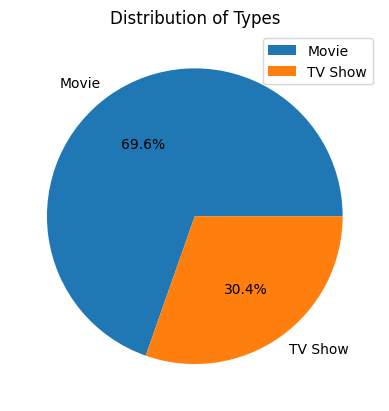

In [ ]:
plt.pie(pivot_type_g["show_id"],labels=pivot_type_g["type"],autopct="%.1f%%")
plt.title("Distribution of Types")
plt.legend()
plt.show()

This is pie chart useful for univariate analysis

**Insights**:
The chart shows that Netflix has a strong focus on movies compared to TV shows.

**Recommendation**:
Netflix has room to expand its TV show offerings, which could help increase its user base.


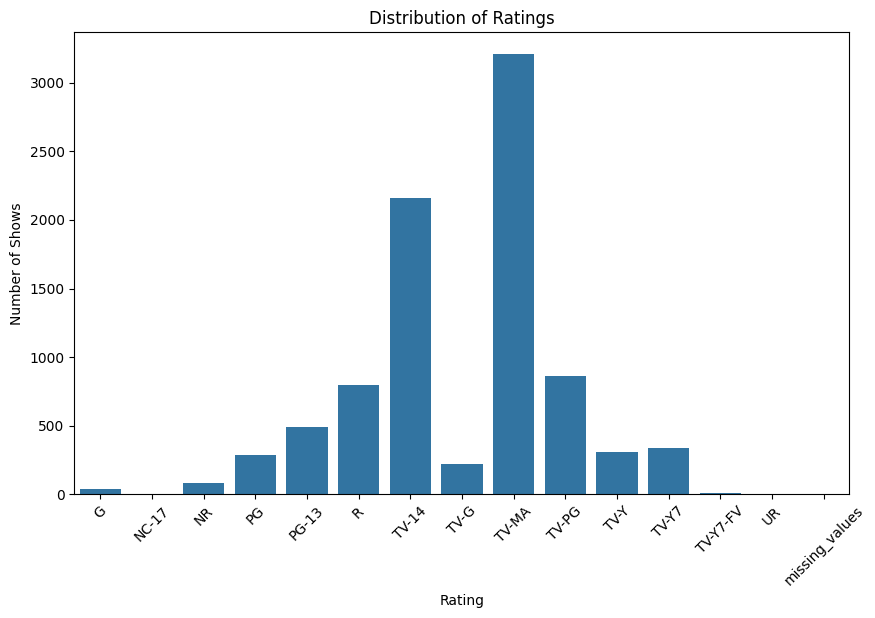

In [ ]:
pivot_rating_g=pivot_rating.reset_index()

pivot_rating_g=pivot_rating_g[pivot_rating_g["rating"]!="missing_values"]
plt.figure(figsize=(10,6))
sns.barplot(x="rating",y="show_id",data=pivot_rating_g)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.xticks(rotation=45)
plt.ylabel("Number of Shows")
plt.show()

### Insights:
1.  Most content is rated "TV-MA," showing a focus on mature audiences.
2.  "TV-14" is also popular, appealing to teenage viewers.
3. Few shows are rated "G," "TV-Y," and "TV-Y7," indicating less family-friendly content.

### Recommendations:
1. Expand "G," "TV-Y," and "TV-Y7" rated content.

2. Continue developing content in these popular categories.


In [ ]:
cleaned_data.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast_unnest,listed_in_unnest,director_unnest,country_unnest,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",missing_values,Documentaries,Kirsten Johnson,United States,2021,September
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,missing_values,South Africa,2021,September
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,missing_values,South Africa,2021,September
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Gail Mabalane,International TV Shows,missing_values,South Africa,2021,September
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Thabang Molaba,International TV Shows,missing_values,South Africa,2021,September


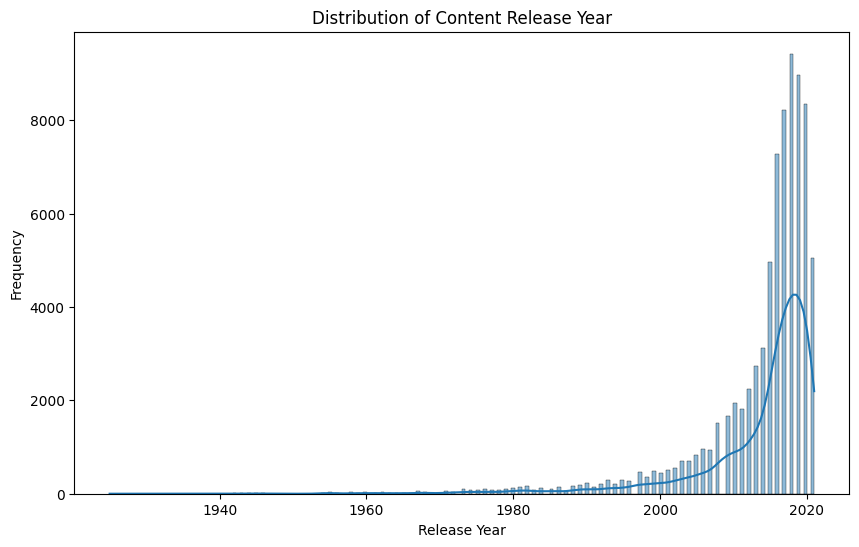

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['release_year'], bins=200, kde=True)
plt.title('Distribution of Content Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


### Insights:
1. Most shows were released after 2000, indicating rapid growth in recent years.
2.  The highest number of releases occurred around 2020, showing Netflix’s focus on new content.
3.  Very few shows were released before 2000, suggesting minimal older content.

### Recommendations:
1.  Consider acquiring classic shows/movies to attract nostalgic viewers.
2.  Understand the dip post-2020 to adjust content strategies accordingly.


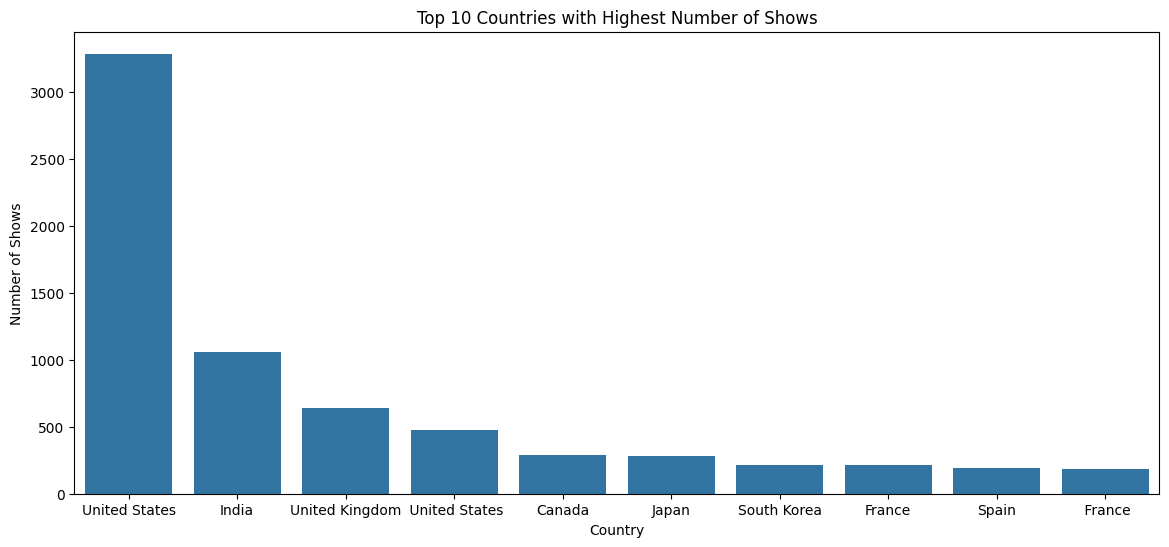

In [ ]:
pivot_country_g=pivot_country.reset_index()
pivot_country_g["country_unnest"]=pivot_country_g["country_unnest"].astype(str)
pivot_country_g.sort_values(by="show_id",ascending=False,inplace=True)

pivot_country_g=pivot_country_g[pivot_country_g['country_unnest']!="unknown_country"]
plt.figure(figsize=(14, 6))
sns.barplot(x="country_unnest",y="show_id",data=pivot_country_g.head(10))
plt.title("Top 10 Countries with Highest Number of Shows")
plt.xlabel("Country")
plt.ylabel("Number of Shows")
plt.show()

### Insights
1. The US leads with the most shows.
2.  India has a strong presence.
3. Other countries have fewer shows.

### Recommendations
1.  Invest in more non-US shows.
2.  Promote Indian content.
3. Focus on countries like France and South Korea.


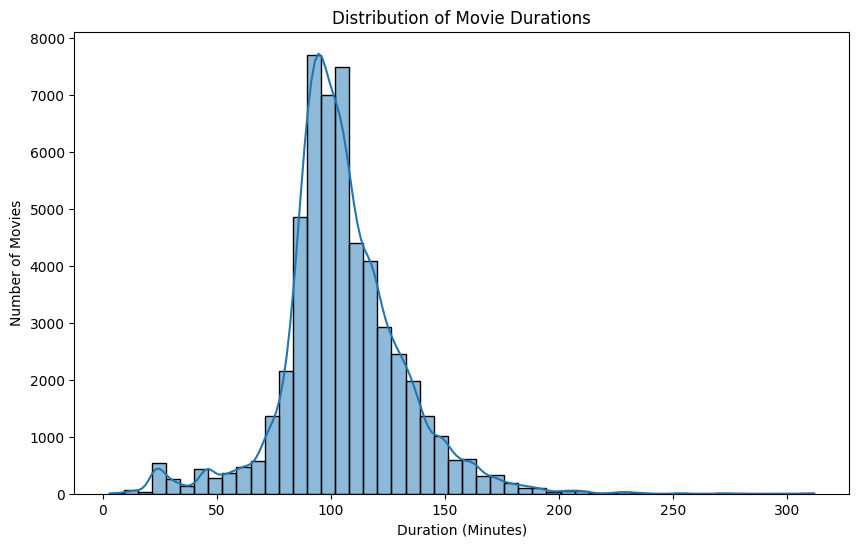

In [ ]:

plt.figure(figsize=(10, 6))

sns.histplot(movie_duration['duration'], bins=50, kde=True)

plt.title('Distribution of Movie Durations')

plt.xlabel('Duration (Minutes)')

plt.ylabel('Number of Movies')

plt.show()


### Insights
1. Most movies are around 100 minutes long.

2.  Very few movies exceed 150 minutes.

### Recommendations
1.  Focus on producing movies within this popular range.
2.  Consider opportunities for longer films to fill gaps.
3. Study shorter films for niche audiences.


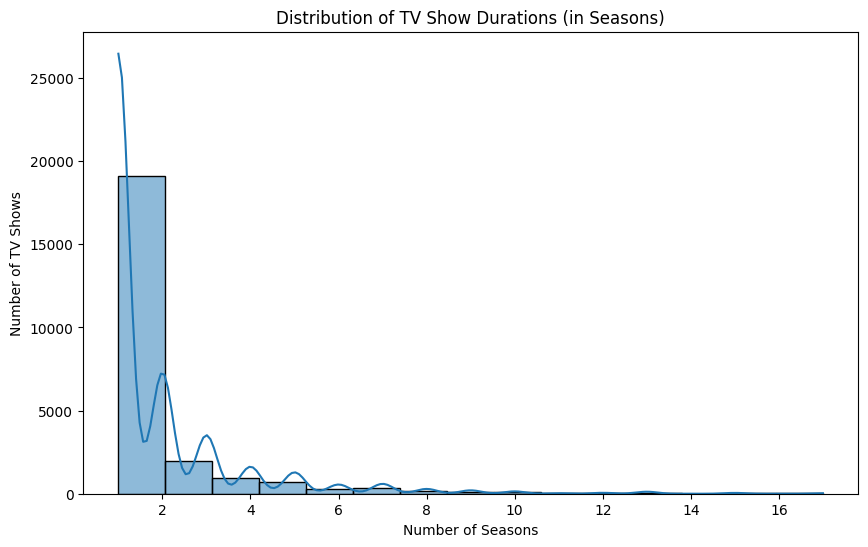

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(tv_show_duration['duration'], bins=15, kde=True)

plt.title('Distribution of TV Show Durations (in Seasons)')

plt.xlabel('Number of Seasons')

plt.ylabel('Number of TV Shows')



plt.show()


### Insights
1. Most TV shows have 1-2 seasons.
2. The number of shows drops significantly after 3 seasons.
3. Very few shows have more than 6 seasons.

### Recommendations
1.  Invest in 1-2 season shows, as they are most common.
2. Test the popularity of 3-4 season shows.
3.  Consider developing more long-running series to engage dedicated viewers.


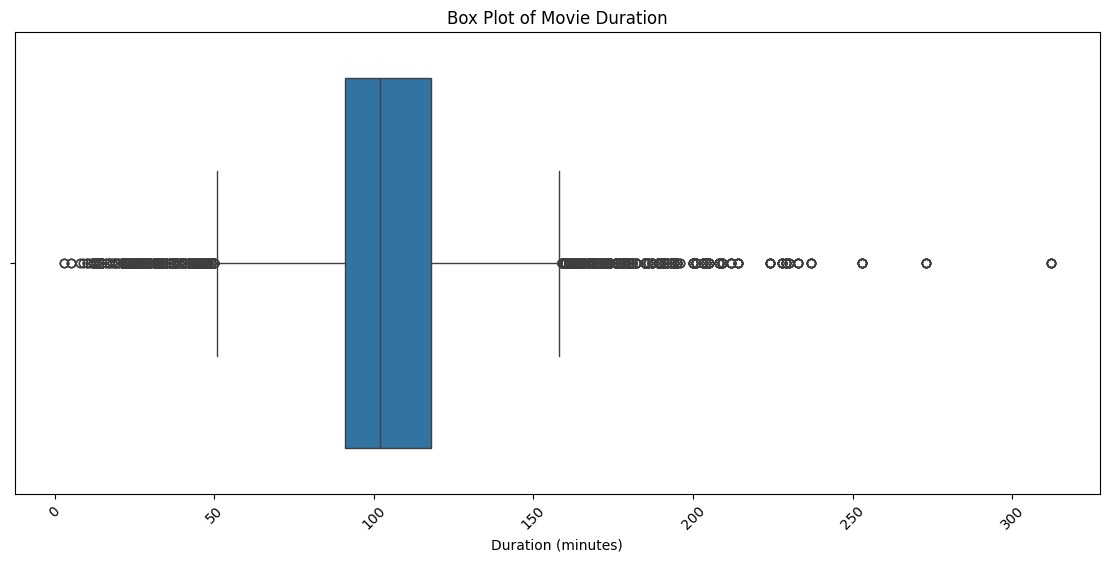

In [ ]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='duration', data=movie_duration, orient='h')

plt.title('Box Plot of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.xticks(rotation=45)

plt.show()


### Insights
1.  The median movie duration is around 100 minutes.
2. Most movies range between approximately 80 to 120 minutes.
3.  There are a significant number of outliers, both short (<50 minutes) and long (>150 minutes), indicating a few unusually short and long movies.

### Recommendations
1.  Continue producing movies within the 80-120 minute range, as this is the most common duration.
2.  Investigate outlier movies to understand audience preferences for very short or long films.


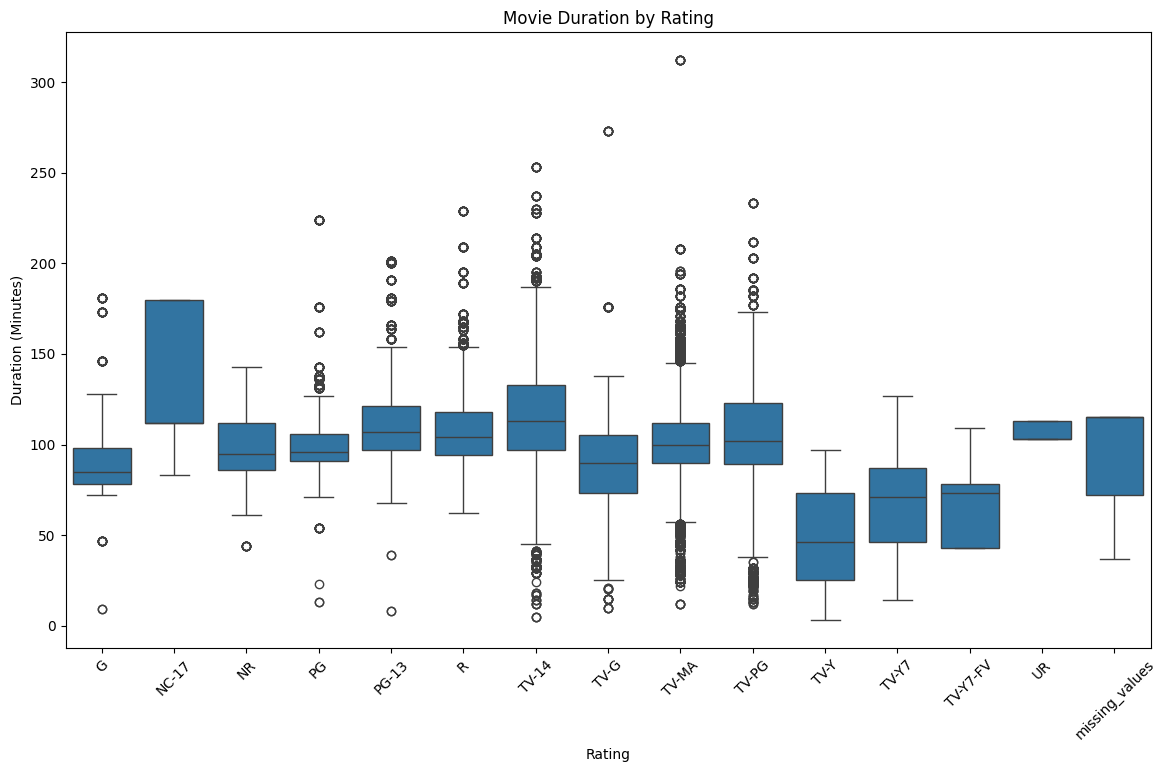

In [ ]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='rating', y='duration', data=movie_duration)

plt.title('Movie Duration by Rating')

plt.xlabel('Rating')

plt.ylabel('Duration (Minutes)')

plt.xticks(rotation=45)

plt.show()




### Insights
1.  NC-17 movies have the highest change in duration, with several outliers.
2.  Most ratings (PG, PG-13, R, TV-14, etc.) show median durations around 90-120 minutes.
3. Movies rated "TV-Y7" and "G" tend to have shorter durations

### Recommendations
1. Analyze why NC-17 movies have a wider duration range for potential niche content.
2. Keep children's content (G, TV-Y7) shorter to suit younger audiences.


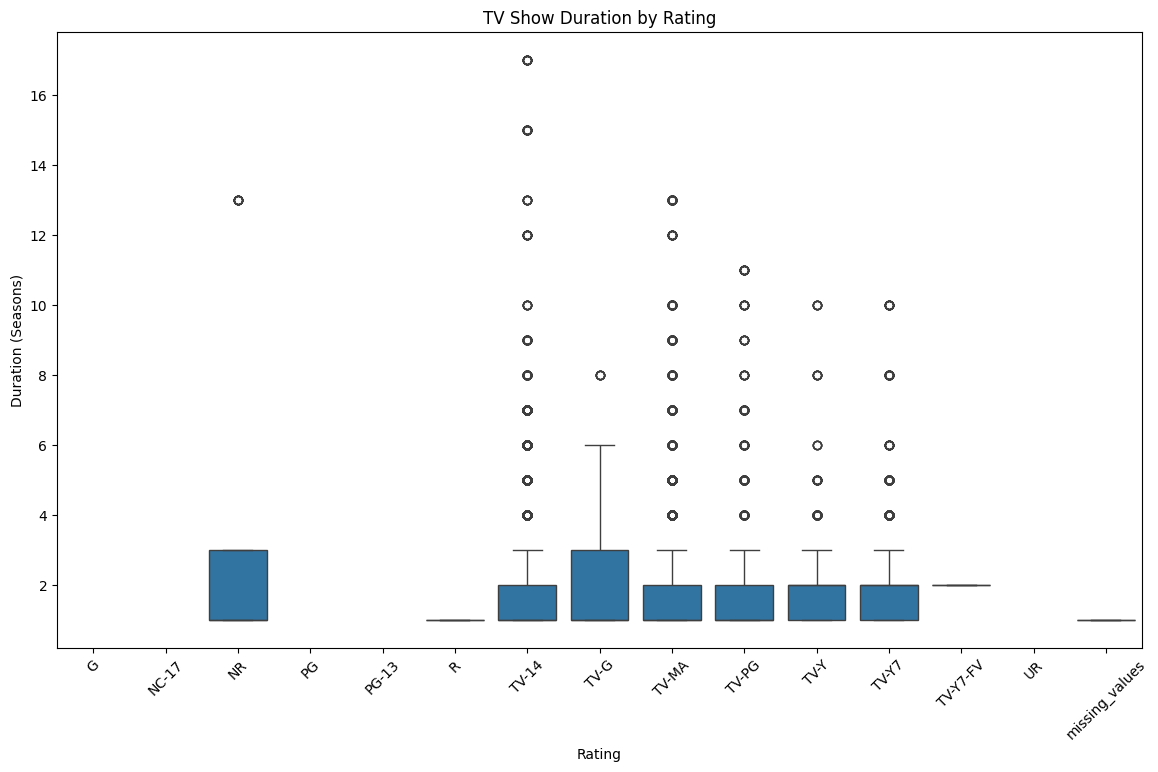

In [ ]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='rating', y='duration', data=tv_show_duration)
plt.title('TV Show Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (Seasons)')
plt.xticks(rotation=45)
plt.show()

### Insights
1. TV-G rated shows tend to have the most seasons compared to other ratings.
2.  Most other ratings (e.g., TV-MA, TV-PG) have TV shows with fewer seasons.
3.  Several ratings have TV shows with significantly higher season counts

### Recommendations
1.  Focus on TV-G shows, as they tend to be longer, indicating sustained viewership.
2. For other ratings, continue with shorter series since they are more common.

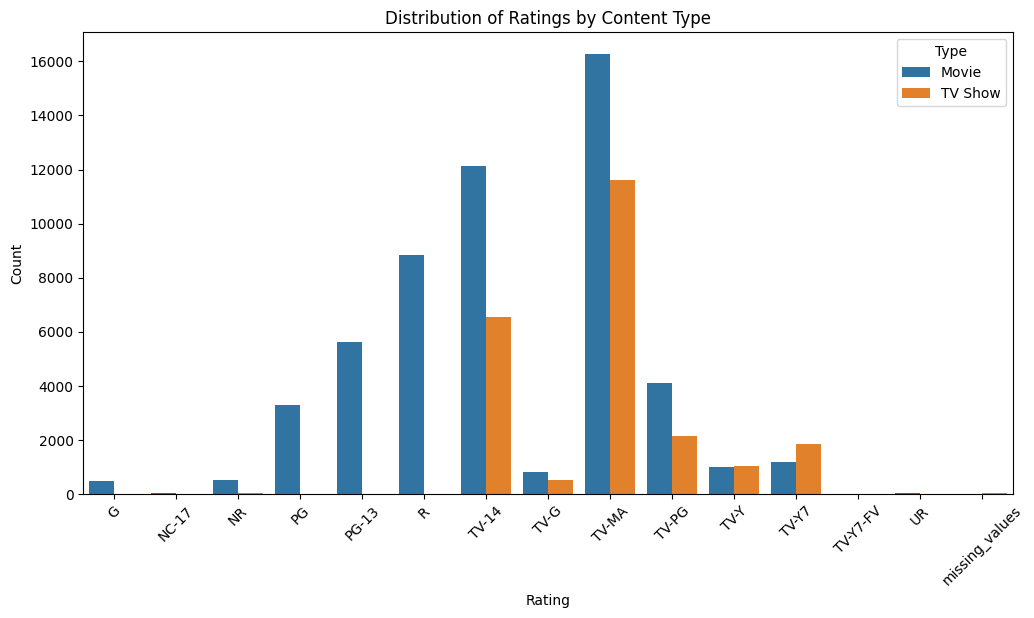

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='rating', hue='type', data=cleaned_data)

plt.title('Distribution of Ratings by Content Type')

plt.xlabel('Rating')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Type')

plt.show()


### Insights
1.  "TV-MA" is the most common rating for both movies and TV shows, indicating a strong focus on mature content.
2.  Movies have higher counts across most ratings except "TV-Y7," where TV shows are more prevalent.
3.  There is very little "G" and "NC-17" content in both categories.

### Recommendations
1.  Maintain focus on "TV-MA" content, as it appeals to a broad audience.
2.  Consider increasing "G" and "TV-Y7" content to attract younger audiences.
3.  Increase TV show content in the popular "R" and "PG-13" categories to match movie offerings.


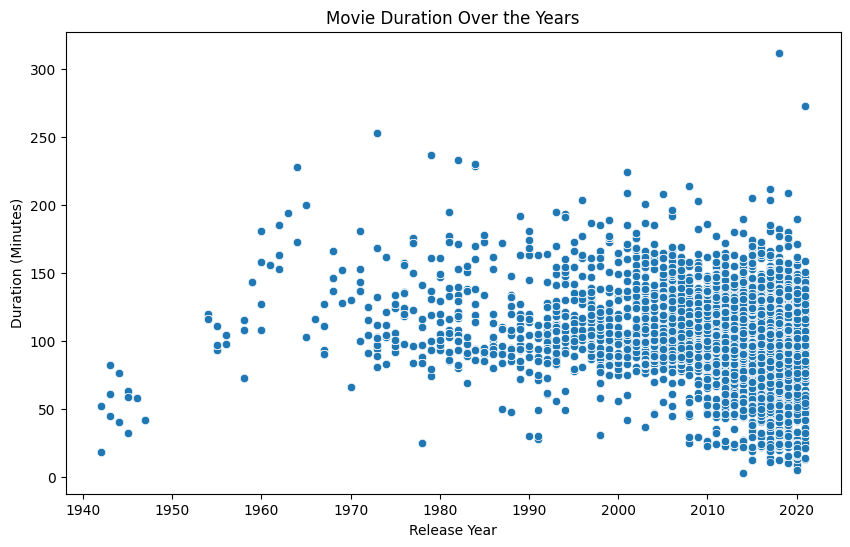

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration', data=movie_duration)
plt.title('Movie Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()


### Insights
1.  Movie durations have remained relatively stable, with most ranging between 80 to 120 minutes after 2000.
2.  Earlier movies (pre-1980) show greater variation in duration, ranging from very short to long.
3.  There are occasional outliers with durations over 250 minutes, but they are rare.

### Recommendations
1.  producing movies in the 80-120 minute range, as this seems to be the preferred duration.
2. creating longer films occasionally for audiences who prefer more extended content.
3.  Investigate why older movies varied more in duration to identify potential opportunities for unique storytelling.


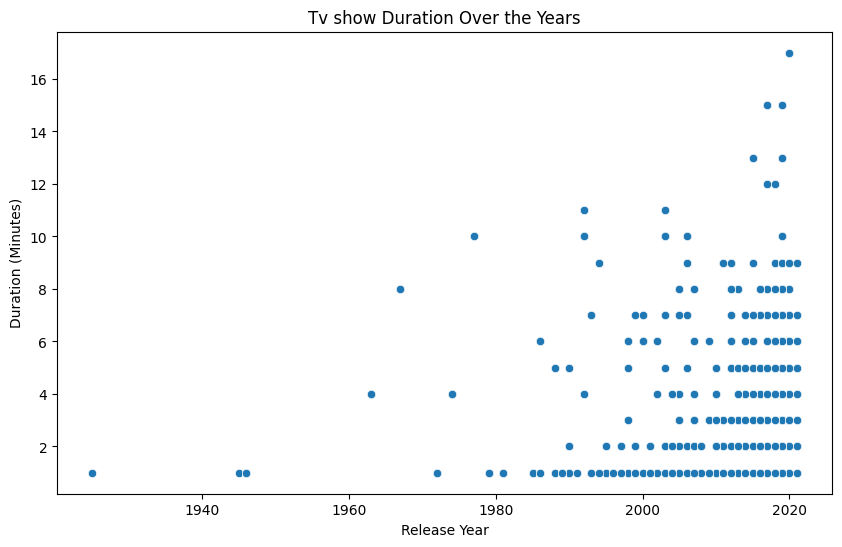

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration', data=tv_show_duration)
plt.title('Tv show Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()


### Insights
1. TV shows released after 2000 have more seasons, indicating a trend toward longer series.
2. Earlier TV shows mostly had 1-2 seasons, showing less variation.
3.  Only a handful of TV shows exceed 10 seasons, even in recent years.

### Recommendations
1.  producing more multi-season TV shows, as recent trends show increased audience interest.
2.  creating shorter series for flexibility and lower production risk.


In [ ]:
top_10_countries = pivot_country_g.head(10).reset_index()["country_unnest"].to_list()
top_10_countries

['United States',
 'India',
 'United Kingdom',
 ' United States',
 'Canada',
 'Japan',
 'South Korea',
 'France',
 'Spain',
 ' France']

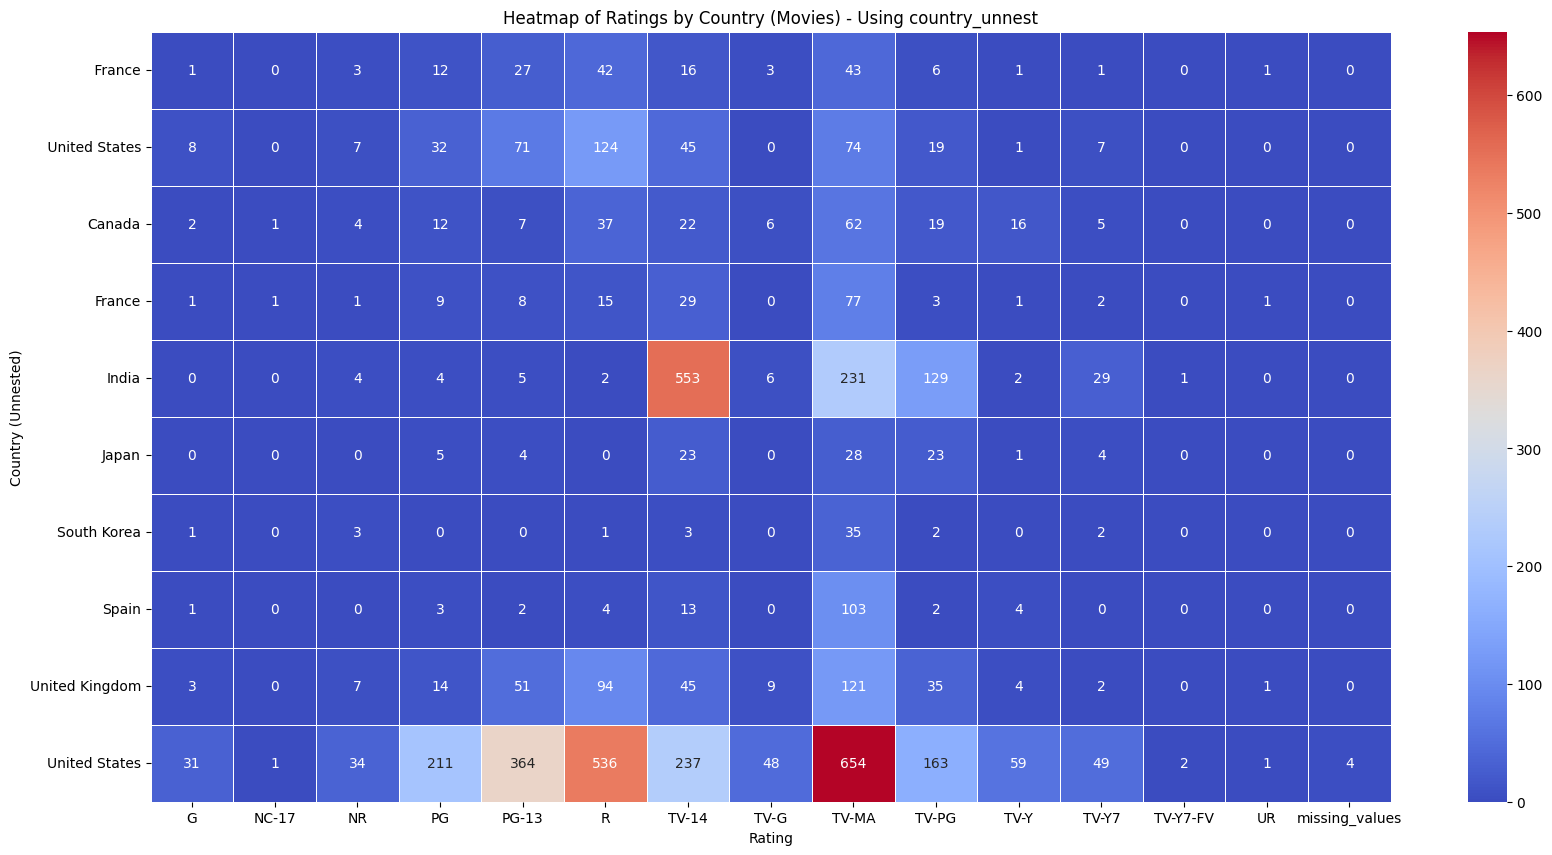

In [ ]:

top_10_movies=movie_duration[movie_duration["country_unnest"].isin(top_10_countries)]

movie_country_rating = top_10_movies.pivot_table(index='country_unnest', columns='rating', values='show_id', aggfunc='nunique', fill_value=0)

plt.figure(figsize=(20, 10))
sns.heatmap(movie_country_rating, cmap='coolwarm', linewidths=0.5, annot=True, fmt="d")
plt.title('Heatmap of Ratings by Country (Movies) - Using country_unnest')
plt.xlabel('Rating')
plt.ylabel('Country (Unnested)')
plt.show()


### Insights
1.  The United States has the highest number of TV-MA rated movies (654), indicating a preference for mature content.
2. India has a high number of "TV-14" (231) and "PG" (553) rated movies, showing a mix of family-friendly and slightly mature content preferences.
3.  Across most countries, "G" rated movies are minimal, suggesting less emphasis on general audience content.

### Recommendations
1.  Consider increasing TV-MA content in other countries, given its popularity in the US.
2. Continue focusing on "PG" and "TV-14" content to cater to India's diverse audience.
3.  Develop more G-rated movies to diversify offerings, especially for family-friendly markets.


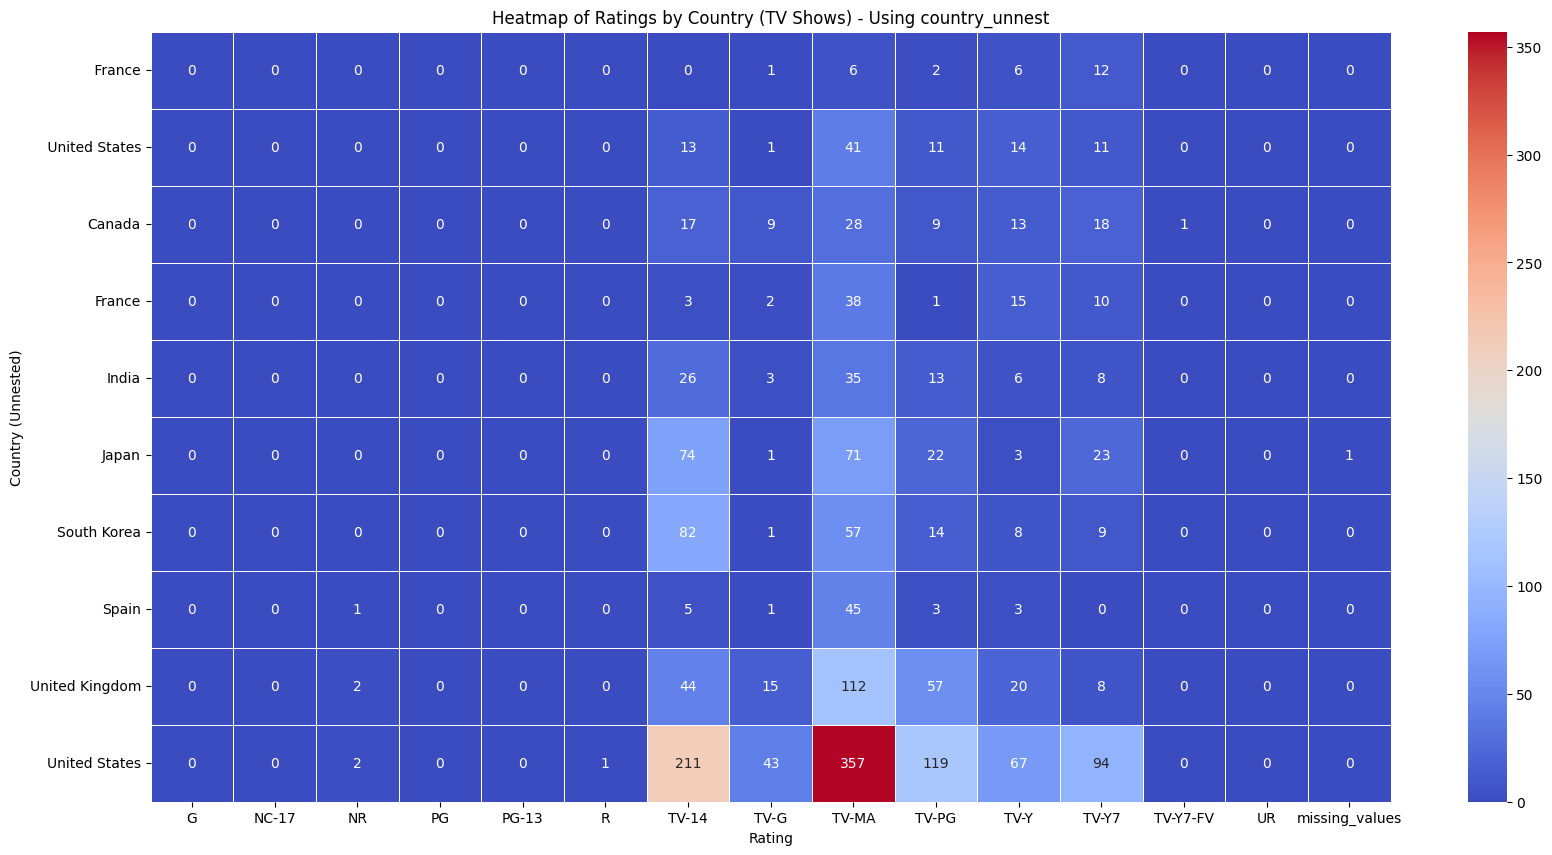

In [ ]:

top_10_tv_shows = tv_show_duration[tv_show_duration["country_unnest"].isin(top_10_countries)]

tv_country_rating = top_10_tv_shows.pivot_table(index='country_unnest', columns='rating', values='show_id', aggfunc='nunique')
plt.figure(figsize=(20, 10))
sns.heatmap(tv_country_rating, cmap='coolwarm', linewidths=0.5, annot=True, fmt="d")
plt.title('Heatmap of Ratings by Country (TV Shows) - Using country_unnest')
plt.xlabel('Rating')
plt.ylabel('Country (Unnested)')
plt.show()


### Insights
1.  The highest number of TV shows rated "TV-MA" (357) is from the United States, indicating a preference for mature content.
2.  Japan (74) and South Korea (82) have a large number of "TV-14" rated shows, suggesting a trend towards
3. The United States also has a high number of TV-G rated shows (211),

### Recommendations
1. Since "TV-MA" is popular in the US, consider producing more mature content for other countries.
2. Focus on TV-14 rated content in these regions to cater to existing trends.
3. Continue producing a mix of TV-G and TV-MA content to appeal to diverse audience preferences.


<Figure size 1200x600 with 0 Axes>

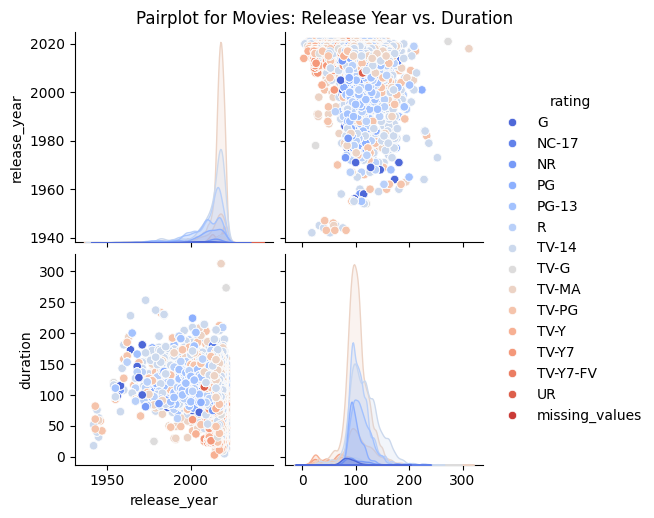

In [ ]:
movie_duration_data=movie_duration[movie_duration["rating"]!="missing_values"]
plt.figure(figsize=(12, 6))

sns.pairplot(movie_duration_data, vars=['release_year', 'duration'], hue='rating', palette='coolwarm', diag_kind='kde')

plt.suptitle('Pairplot for Movies: Release Year vs. Duration', y=1.02)
plt.show()


### Insights
1. Most movies released after 2000 have durations between 80 to 120 minutes, regardless of rating.
2.  Pre-1980 movies show greater variation in duration, indicating less standardization in that era.
3.  TV-MA and R-rated movies are more prevalent in recent years, while older movies feature more PG and G ratings.

### Recommendations
1.  Continue producing movies in the 80-120 minute range, as this trend persists over time.
2. Investigate why older movies had varied durations to incorporate flexibility in current productions.
3. Since TV-MA and R ratings are dominant in recent years, consider emphasizing mature themes in new releases.


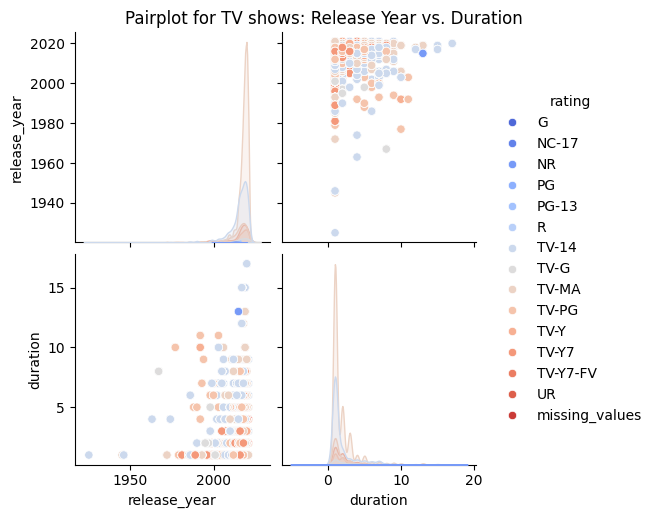

In [ ]:
tv_show_duration_data=tv_show_duration[tv_show_duration["rating"]!="missing_values"]
sns.pairplot(tv_show_duration_data, vars=['release_year', 'duration'], hue='rating', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot for TV shows: Release Year vs. Duration', y=1.02)
plt.show()


### Insights
1.  Most TV shows released after 2000 have fewer seasons (1-3), indicating a preference for shorter series.
2.  Older TV shows (pre-1980) tended to have more seasons, showing that longer-running series were more common historically.
3. Recent shows have more diverse ratings, with a significant number of TV-Y and TV-14 rated shows, suggesting a wider variety of content.

### Recommendations
1.  Continue producing shorter TV shows (1-3 seasons) to match current trends.
2. Explore opportunities for longer series based on successful older shows, which could engage dedicated viewers.
3. Keep creating TV shows across different ratings (TV-Y, TV-14, etc.) to cater to various audience segments.


#Recommendations
1. Invest in more TV-MA content for the US market, as it's the most popular rating category.
2. In India, many movies are PG-rated and TV-14, showing that families and teenagers watch a lot of these.
3. Very few G-rated (general audience) movies are found in most countries, showing a lack of content for all ages.
4. Most movies are about 90 to 120 minutes long, but NC-17 rated movies vary a lot in their length.
5. Shorter movies are common for G and TV-Y7 ratings, which is good for kids who don’t sit long.
6. TV shows made recently usually have only 1 to 3 seasons, but older shows had many more.
7. TV-G and TV-14 are popular ratings for TV shows that run for longer seasons.
8. After the year 2000, most movies stayed around 80-120 minutes, but older movies had many different lengths.
9. TV shows after 2000 have become shorter and easier to watch quickly, matching today’s habits.
10. Movies have more counts in almost all ratings except TV-Y7, where TV shows are more frequent.

